In [24]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import os

sns.set_style("whitegrid") 

# LSTM and GRU v1

In [25]:
folders = ["gru_simple", "gru_wei", "gru_fade", "gru_top", 
           "lstm_simple", "lstm_wei", "lstm_fade", "lstm_top", 
           "gru2_simple", "gru2_wei", "gru2_fade", "gru2_top", 
           "lstm2_simple", "lstm2_wei", "lstm2_fade", "lstm2_top"]

history_files = ["val_top", "val_med", "val_low", "val_non", "val_put"]

metrics = {x:{} for x in history_files}
for hs in history_files:
    models = {}
    approach = {}
    for fold in folders:
        if fold.split("_")[0] not in models:
            models[fold.split("_")[0]] = {}
        if fold.split("_")[1] not in approach:
            approach[fold.split("_")[1]] = {}
        with open(fold + "/history." + hs + ".txt") as inp:
            data = [float(x) for x in inp.readlines()]
            models[fold.split("_")[0]][fold.split("_")[1]] = data
            approach[fold.split("_")[1]][fold.split("_")[0]] = data
    metrics[hs] = (models, approach)

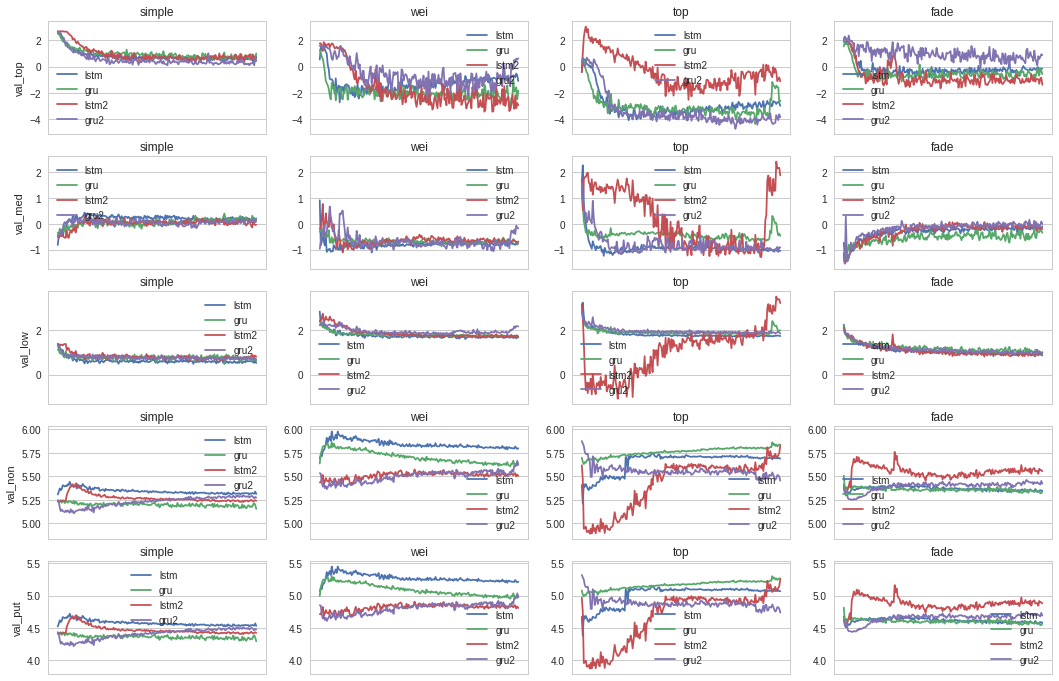

In [26]:
fig = plt.figure(figsize=(18, 12))
ax = []
for i in range(5):
    ax.append([fig.add_subplot(5, 4, 4*i+1)])
    for j in range(1,4):
        ax[-1].append(fig.add_subplot(5, 4, 4*i + j + 1, sharey=ax[-1][-1]))

for r, hs in enumerate(history_files):
    _, approach = metrics[hs]
    for c, app in enumerate(approach):
        if c == 0: ax[r][c].set_ylabel(hs)
        ax[r][c].set_title(app)
        for subkey in approach[app]:
            ax[r][c].plot(np.log(approach[app][subkey]), label = subkey)
            ax[r][c].legend()
        ax[r][c].get_xaxis().set_visible(False)
        if r != 4:
            ax[r][c].set_xticklabels([])

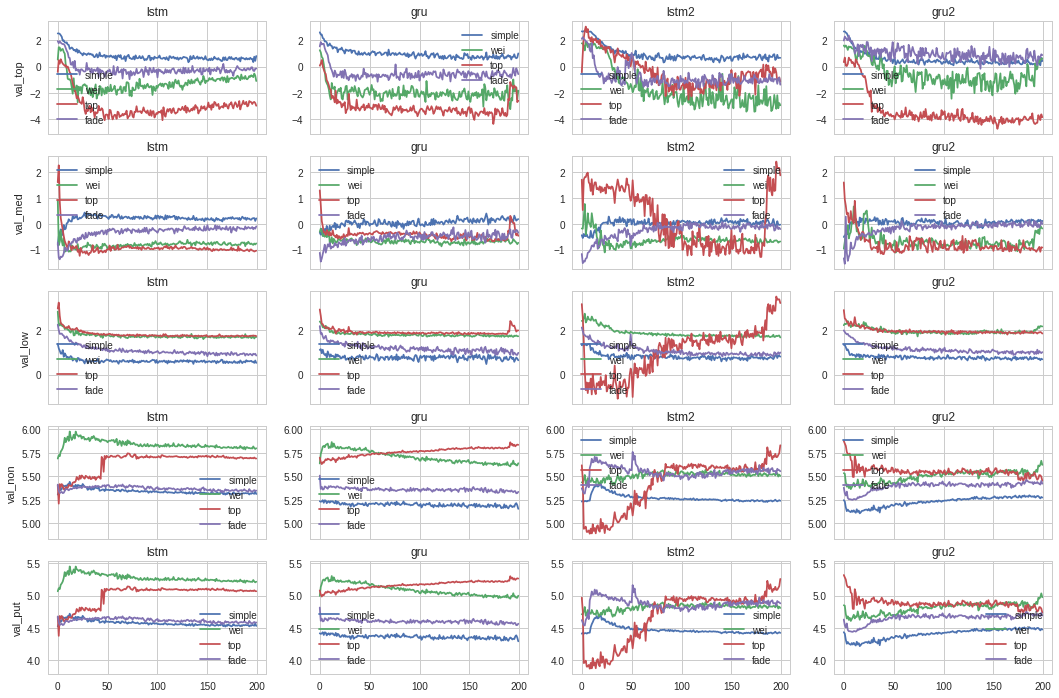

In [27]:
n_models = 4

fig = plt.figure(figsize=(18, 12))
ax = []

for i in range(5):
    ax.append([fig.add_subplot(5, n_models, n_models*i+1)])
    for j in range(1,n_models):
        ax[-1].append(fig.add_subplot(5, n_models, n_models*i + j + 1, sharey=ax[-1][-1]))

for r, hs in enumerate(history_files):
    models, _ = metrics[hs]
    for c, mod in enumerate(models):
        if c == 0: ax[r][c].set_ylabel(hs)
        ax[r][c].set_title(mod)
        for subkey in models[mod]:
            ax[r][c].plot(np.log(models[mod][subkey]), label = subkey)
            ax[r][c].legend()
        if r != 4:
            ax[r][c].set_xticklabels([])

# GRU v2 models

In [1]:
# no 9mers_imbalanced due to the very poor results

folders = ["gru_wei", "gru2_wei", "gru3_wei", "gru4_wei",
           "gru_fade", "gru2_fade", "gru3_fade", "gru4_fade"]

history_files = ["val_top", "val_med", "val_low", "val_non", "val_put"]

metrics = {x:{} for x in history_files}
for hs in history_files:
    models = {}
    approach = {}
    for fold in folders:
        if fold.split("_")[0] not in models:
            models[fold.split("_")[0]] = {}
        if fold.split("_")[1] not in approach:
            approach[fold.split("_")[1]] = {}
        with open(fold + "/history." + hs + ".txt") as inp:
            data = [float(x) for x in inp.readlines()]
            models[fold.split("_")[0]][fold.split("_")[1]] = data
            approach[fold.split("_")[1]][fold.split("_")[0]] = data
    metrics[hs] = (models, approach)

In [3]:
fig = plt.figure(figsize=(18, 12))
ax = []
for i in range(5):
    ax.append([fig.add_subplot(5, 2, 2*i+1)])
    for j in range(1,4):
        ax[-1].append(fig.add_subplot(5, 2, 2*i + j + 1, sharey=ax[-1][-1]))

for r, hs in enumerate(history_files):
    _, approach = metrics[hs]
    for c, app in enumerate(approach):
        if c == 0: ax[r][c].set_ylabel(hs)
        ax[r][c].set_title(app)
        for subkey in approach[app]:
            ax[r][c].plot(np.log(approach[app][subkey]), label = subkey)
            ax[r][c].legend()
        if r != 1:
            ax[r][c].set_xticklabels([])

NameError: name 'plt' is not defined

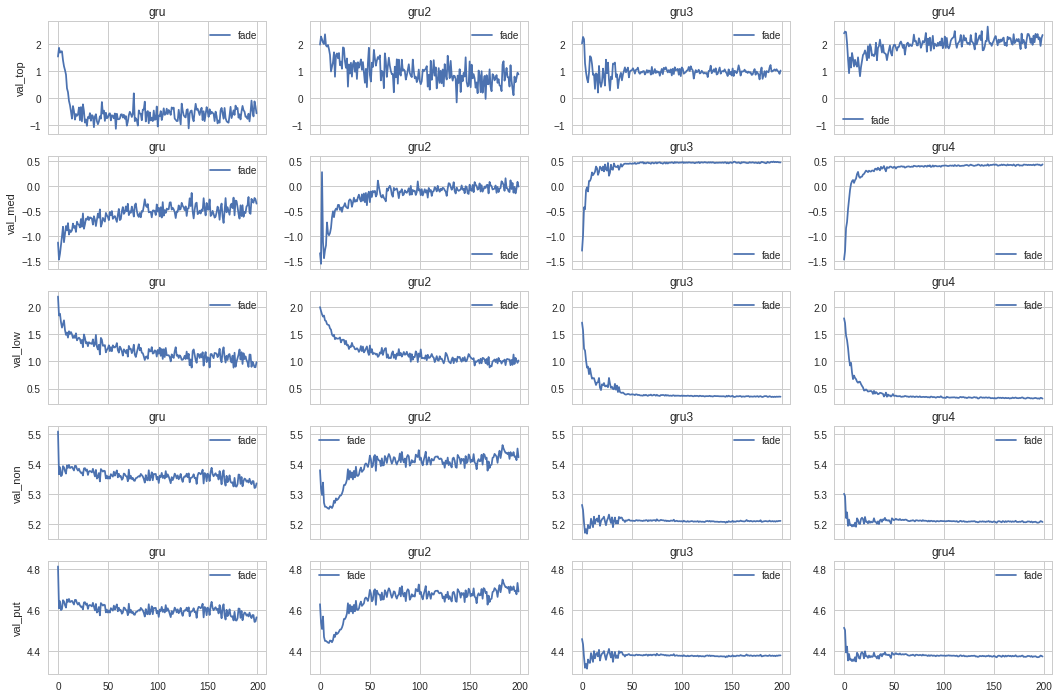

In [30]:
n_models = 4

fig = plt.figure(figsize=(18, 12))
ax = []

for i in range(5):
    ax.append([fig.add_subplot(5, n_models, n_models*i+1)])
    for j in range(1,n_models):
        ax[-1].append(fig.add_subplot(5, n_models, n_models*i + j + 1, sharey=ax[-1][-1]))

for r, hs in enumerate(history_files):
    models, _ = metrics[hs]
    for c, mod in enumerate(sorted(models.keys())):
        if c == 0: ax[r][c].set_ylabel(hs)
        ax[r][c].set_title(mod)
        for subkey in models[mod]:
            ax[r][c].plot(np.log(models[mod][subkey]), label = subkey)
            ax[r][c].legend()
        if r != 4:
            ax[r][c].set_xticklabels([])